This notebook explores 6 soil moisture stations on MPG Ranch.  The source file can be downloaded here: [Link](https://drive.google.com/uc?id=1F-OzrbaqUR28skpxc8Ai6hjpSq_VjSpD)
The source data was generated in the '[soil moisture collection](https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/soil_moisture_collection.ipynb#scrollTo=r4d2DZpBFHzq)' notebook.

# Load


## Libraries

In [1]:
import pandas as pd

## Data

In [2]:
src = 'https://drive.google.com/uc?id=1F-OzrbaqUR28skpxc8Ai6hjpSq_VjSpD'

In [3]:
df = pd.read_csv(src, parse_dates=['Measurement Time'])

# Explore

In [36]:
# 160152 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160153 entries, 0 to 160152
Data columns (total 6 columns):
Measurement Time    160153 non-null datetime64[ns]
port                160153 non-null object
kPa Potential       160153 non-null float64
°C Temp             160153 non-null float64
depth (in)          160153 non-null int64
station             160153 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.3+ MB


In [37]:
# sample of initial data structure
df.head()

,Measurement Time,port,kPa Potential,°C Temp,depth (in),station
0,2000-11-07 06:00:00,Port 1,-1329.615732,25.2,6,sainfoin bench
1,2000-11-07 12:00:00,Port 1,-1075.786637,28.4,6,sainfoin bench
2,2000-11-07 18:00:00,Port 1,-1238.585938,26.1,6,sainfoin bench
3,2000-11-08 00:00:00,Port 1,-1512.607137,23.3,6,sainfoin bench
4,2000-11-08 06:00:00,Port 1,-1372.859664,24.8,6,sainfoin bench


In [38]:
# Set the index to the Measurement time
df = df.set_index('Measurement Time')

In [39]:
# Recorded sample times range from 2000-11-07 06:00:00 to 2019-06-09 18:00:00
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160153 entries, 2000-11-07 06:00:00 to 2019-06-09 18:00:00
Data columns (total 5 columns):
port             160153 non-null object
kPa Potential    160153 non-null float64
°C Temp          160153 non-null float64
depth (in)       160153 non-null int64
station          160153 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 7.3+ MB


In [40]:
# Unique Moisture Stations collocated with Weather Stations
for station in df.station.unique().tolist():
  print(station.title())

Sainfoin Bench
Baldy Draw
Baldy Summit
Indian Ridge
South Baldy Ridge
Orchard House


In [41]:
df.groupby(pd.Grouper(freq='M')).mean().tail()

,kPa Potential,°C Temp,depth (in)
Measurement Time,,,
2019-02-28,-1121.496556,1.668066,19.640884
2019-03-31,-725.868413,1.852218,20.238683
2019-04-30,-11.545626,6.763452,20.203969
2019-05-31,-27.801917,11.160893,20.324324
2019-06-30,-104.117191,15.164662,20.661654


# Explore

In [46]:
df = df['2014':'2018']

In [60]:
sample = df[(df['depth (in)'] == 36) & (df.station == 'sainfoin bench')]\
    .groupby(pd.Grouper(freq='D'))\
    .mean()

In [61]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2014-01-01 to 2018-12-05
Freq: D
Data columns (total 3 columns):
kPa Potential    1775 non-null float64
°C Temp          1775 non-null float64
depth (in)       1775 non-null float64
dtypes: float64(3)
memory usage: 56.2 KB


In [53]:
import bokeh.io
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [56]:
bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [62]:
p = figure(x_axis_type="datetime", plot_width=800, plot_height=400, title="Z")
p.line(sample.index, sample['kPa Potential'])
show(p)

In [22]:
df.station.unique()

array(['sainfoin bench', 'baldy draw', 'baldy summit', 'indian ridge',
       'south baldy ridge', 'orchard house'], dtype=object)

In [48]:
df.station.unique().tolist()

['sainfoin bench',
 'baldy draw',
 'baldy summit',
 'indian ridge',
 'south baldy ridge',
 'orchard house']

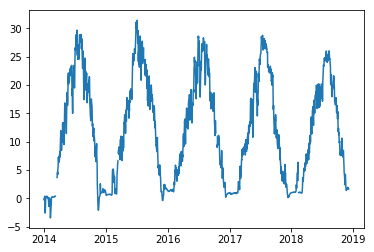

In [86]:
plt.plot(df[(df['depth (in)'] == 6) & (df.station == 'sainfoin bench')]\
    .groupby(pd.Grouper(freq='D'))\
    .mean()['°C Temp'])